<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Histogram-Equalization" data-toc-modified-id="Histogram-Equalization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Histogram Equalization</a></span></li></ul></div>

## Histogram Equalization

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [19]:
def histogram(img):
    height = img.shape[0]
    width = img.shape[1]
    
    hist = np.zeros((256))

    for i in np.arange(height):
        for j in np.arange(width):
            a = img.item(i,j)
            hist[a] += 1      
    return hist

In [20]:
def cumulative_histogram(hist):
    cum_hist = hist.copy()
    
    for i in np.arange(1, 256):
        cum_hist[i] = cum_hist[i-1] + cum_hist[i]
        
    return cum_hist

uint8
height= 511 width =  511


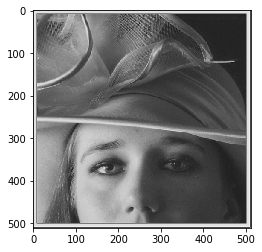

In [21]:
img = cv2.imread('images/img1.jpg', cv2.IMREAD_GRAYSCALE)
img_out = img.copy()
print(img.dtype)
height = img.shape[0]
width = img.shape[1]
print('height=',height,'width = ',width)

plt.figure()
plt.imshow(img,'gray')

<BarContainer object of 256 artists>

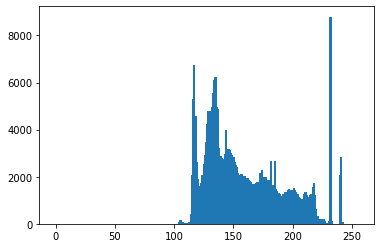

In [22]:
height = img.shape[0]
width = img.shape[1]
pixels = width * height

hist = histogram(img)
cum_hist = cumulative_histogram(hist)

plt.figure()
plt.bar(np.arange(256),hist,width = 2)

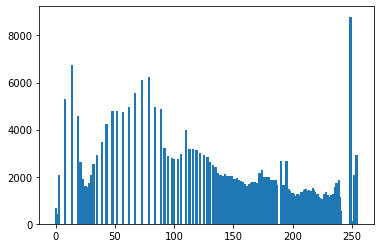

In [23]:
for i in np.arange(height):
    for j in np.arange(width):
        a = img.item(i,j)
        b = math.floor(cum_hist[a] * 255.0 / pixels)
        img_out.itemset((i,j), b)

histOut = histogram(img_out)

plt.figure()
plt.bar(np.arange(256),histOut,width = 2)
plt.show()

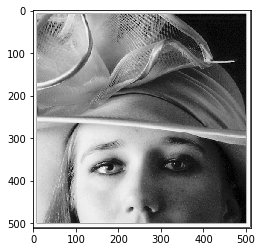

In [25]:
#cv2.imwrite('images/hist_eq.jpg', img)

plt.figure()
plt.imshow(img_out,'gray')

In [17]:
img.max()

255